# LSTM Sentiment Classifier

In this notebook , we use an LSTM to classify IMDB movie reviews by their sentiment

### Load Dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import LSTM # new! 
from tensorflow.keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 

### Set Hyperparameters

In [2]:
# output directory name:
output_dir = 'model_output/LSTM'

# training
epochs = 16
batch_size = 128

# Vector_Space Embedding:
n_dim = 64
n_unique_words = 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

# LSTM Layer Architecture:
n_lstm = 256
drop_lstm = 0.2

# Dense Layer Architecture:
n_dense = 256
dropout = 0.2


### Load Data

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

17464789/17464789 [==============================] - 1s 0us/step


### Preprocess Data

In [4]:
x_train = pad_sequences(x_train, maxlen= max_review_length, padding= pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding= pad_type, truncating=trunc_type, value=0)

### Design Neural Network Architecture

In [5]:
model = Sequential()

# first hidden layer:
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

# second hidden layer:
model.add(LSTM(n_lstm, dropout=drop_lstm))

# third hidden layer:
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

# Output layer:
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

### Configure Model 

In [7]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [8]:
modelcheckpoint = ModelCheckpoint(filepath= output_dir + "/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

### Train !

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/16
196/196 [==============================] - 12s 25ms/step - loss: 0.5645 - accuracy: 0.7168 - val_loss: 0.3680 - val_accuracy: 0.8378
Epoch 2/16
196/196 [==============================] - 4s 21ms/step - loss: 0.3143 - accuracy: 0.8680 - val_loss: 0.3593 - val_accuracy: 0.8417
Epoch 3/16
196/196 [==============================] - 4s 21ms/step - loss: 0.2564 - accuracy: 0.8970 - val_loss: 0.3596 - val_accuracy: 0.8417
Epoch 4/16
196/196 [==============================] - 4s 21ms/step - loss: 0.2189 - accuracy: 0.9157 - val_loss: 0.3776 - val_accuracy: 0.8438
Epoch 5/16
196/196 [==============================] - 4s 21ms/step - loss: 0.1826 - accuracy: 0.9313 - val_loss: 0.5072 - val_accuracy: 0.8253
Epoch 6/16
196/196 [==============================] - 4s 21ms/step - loss: 0.1601 - accuracy: 0.9382 - val_loss: 0.4193 - val_accuracy: 0.8367
Epoch 7/16
196/196 [==============================] - 4s 21ms/step - loss: 0.1301 - accuracy: 0.9519 - val_loss: 0.4749 - val_accuracy: 0.838

### Evaluate

In [10]:
model.load_weights(output_dir+"/weights.02.hdf5")

In [11]:
y_hat = model.predict(x_valid)

782/782 [==============================] - 4s 4ms/step


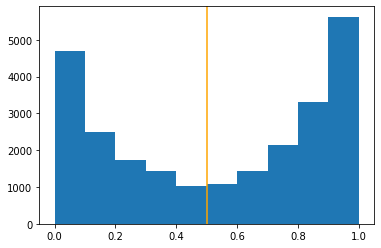

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [13]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.33'